In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras.models as km
from keras.models import Sequential
from keras import activations, initializers, regularizers, constraints
from keras.layers import Dense, Activation

In [42]:
df = pd.read_csv("/content/winequality-red.csv")

In [43]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [45]:
df.shape

(1599, 12)

In [46]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [47]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [48]:
df.duplicated().sum()

np.int64(240)

In [49]:
df = df.drop_duplicates()

In [50]:
df.duplicated().sum()


np.int64(0)

In [51]:
df.shape

(1359, 12)

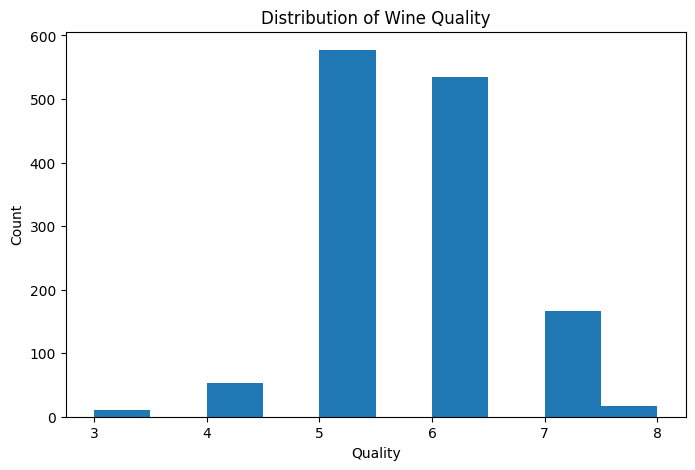

In [52]:
plt.figure(figsize=(8,5))
plt.hist(df['quality'], bins=10)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

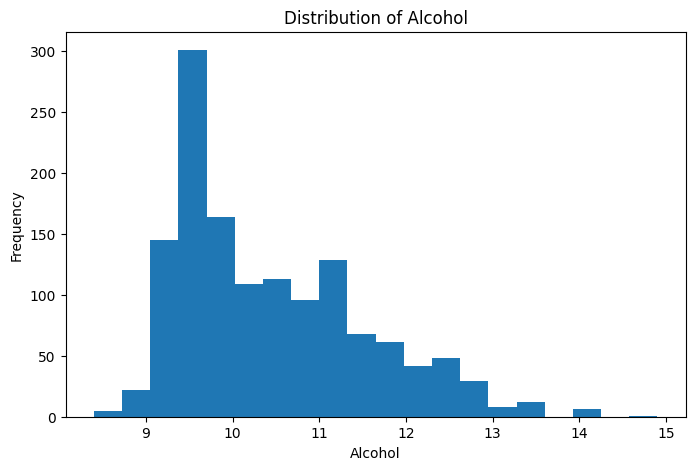

In [53]:
plt.figure(figsize=(8,5))
plt.hist(df['alcohol'], bins=20)
plt.title("Distribution of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()


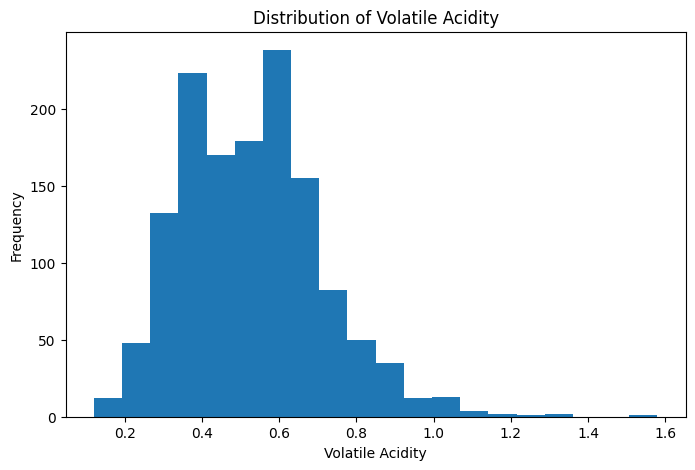

In [54]:
plt.figure(figsize=(8,5))
plt.hist(df['volatile acidity'], bins=20)
plt.title("Distribution of Volatile Acidity")
plt.xlabel("Volatile Acidity")
plt.ylabel("Frequency")
plt.show()


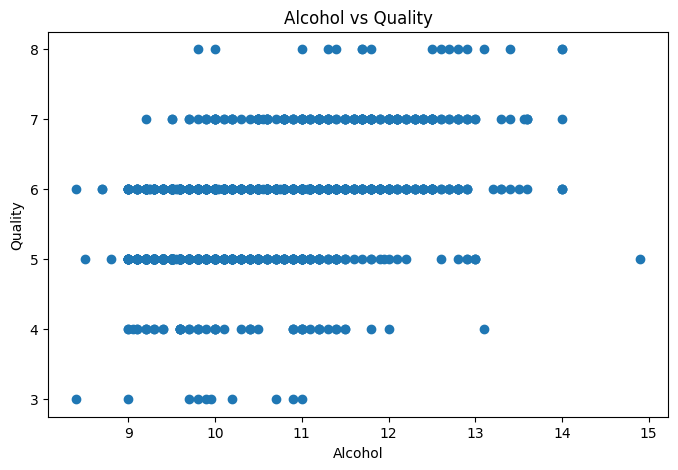

In [55]:
plt.figure(figsize=(8,5))
plt.scatter(df['alcohol'], df['quality'])
plt.title("Alcohol vs Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()


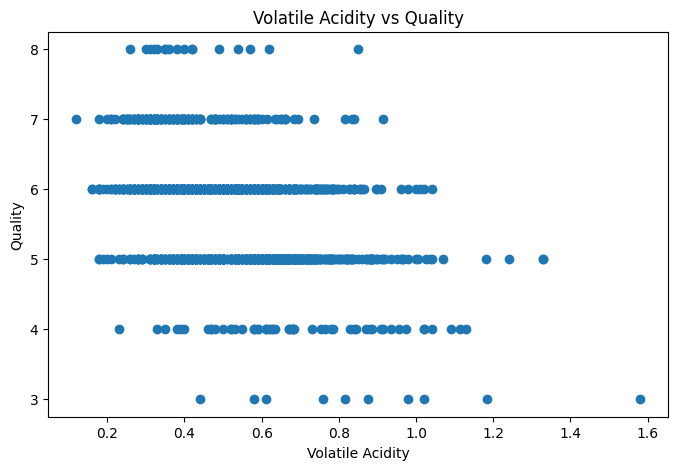

In [56]:
plt.figure(figsize=(8,5))
plt.scatter(df['volatile acidity'], df['quality'])
plt.title("Volatile Acidity vs Quality")
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")
plt.show()


<Figure size 800x500 with 0 Axes>

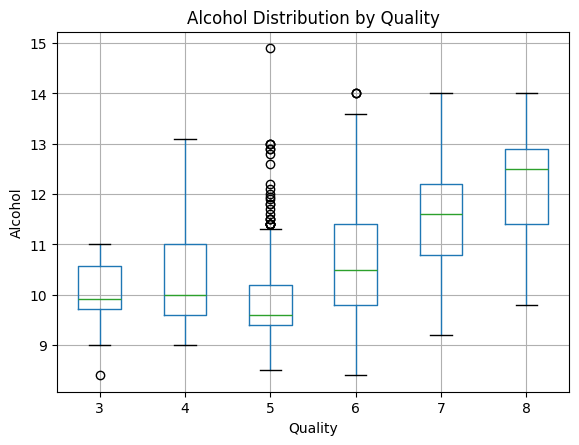

In [57]:
plt.figure(figsize=(8,5))
df.boxplot(column='alcohol', by='quality')
plt.title("Alcohol Distribution by Quality")
plt.suptitle("")
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.show()


<Figure size 800x500 with 0 Axes>

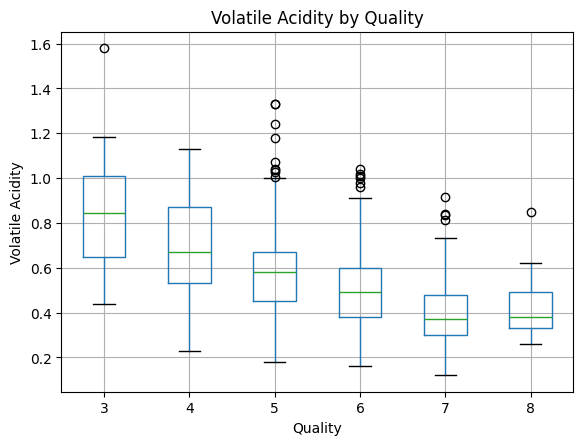

In [58]:
plt.figure(figsize=(8,5))
df.boxplot(column='volatile acidity', by='quality')
plt.title("Volatile Acidity by Quality")
plt.suptitle("")
plt.xlabel("Quality")
plt.ylabel("Volatile Acidity")
plt.show()


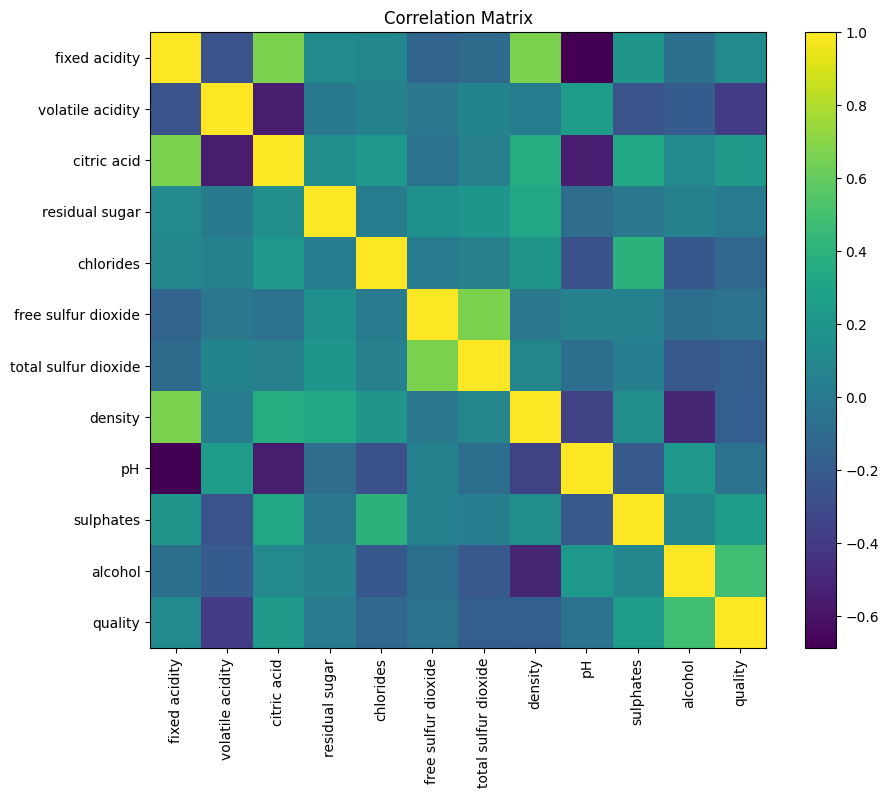

In [59]:
corr = df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()


In [60]:
corr['quality'].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.480343
sulphates,0.248835
citric acid,0.228057
fixed acidity,0.119024
residual sugar,0.013640
free sulfur dioxide,-0.050463
pH,-0.055245
chlorides,-0.130988
total sulfur dioxide,-0.177855


In [61]:
df.groupby("quality")["alcohol"].mean()

,alcohol
quality,
3,9.955000
4,10.265094
5,9.888562
6,10.658879
7,11.491118
8,12.158824


In [62]:
df.groupby("quality")["volatile acidity"].mean()

,volatile acidity
quality,
3,0.884500
4,0.693962
5,0.578596
6,0.496084
7,0.403653
8,0.427647


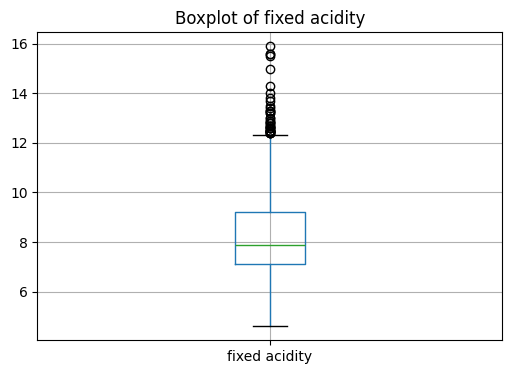

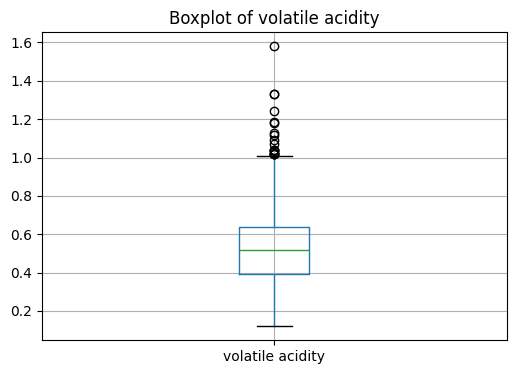

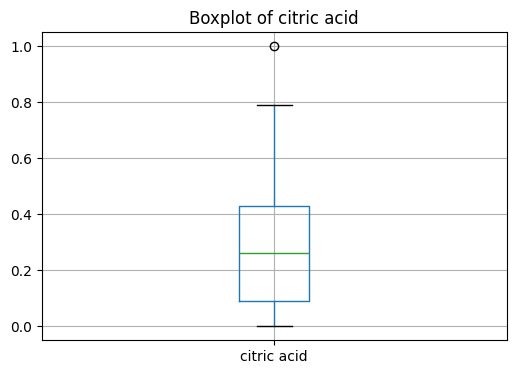

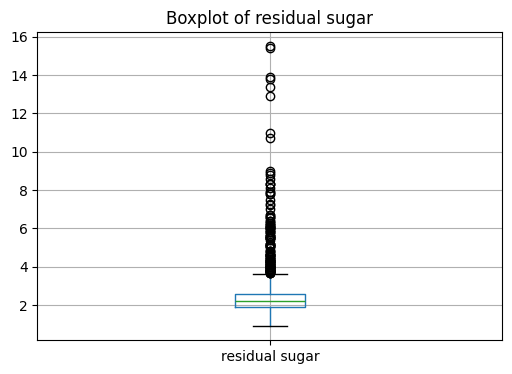

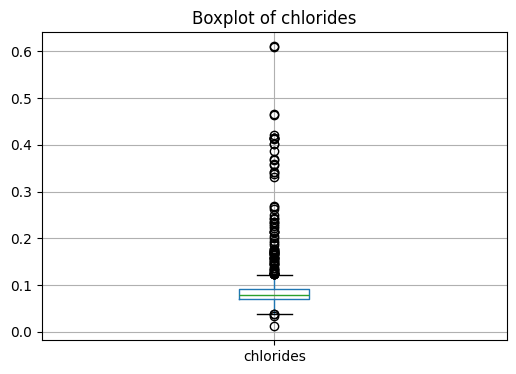

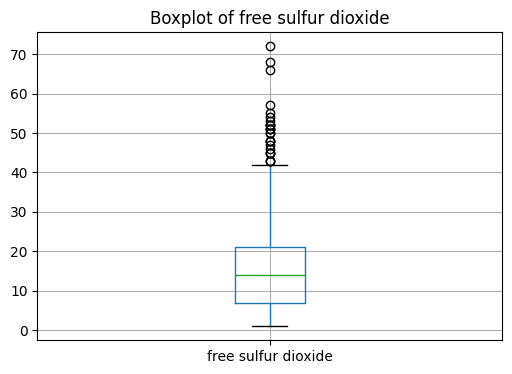

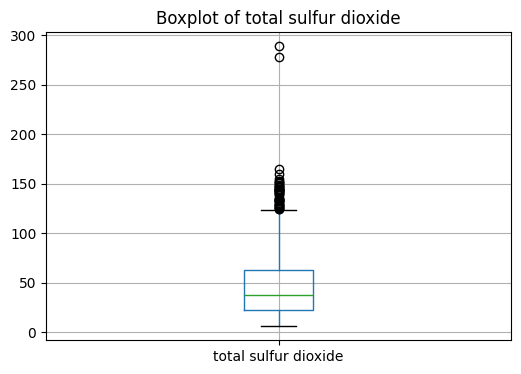

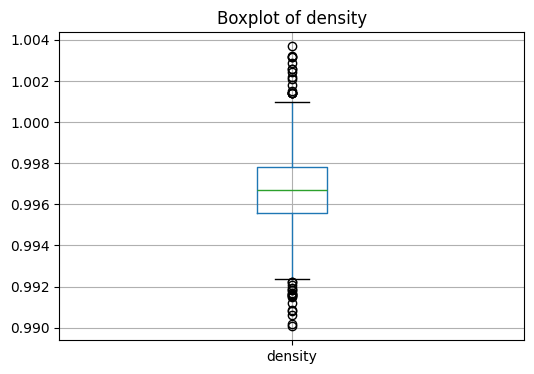

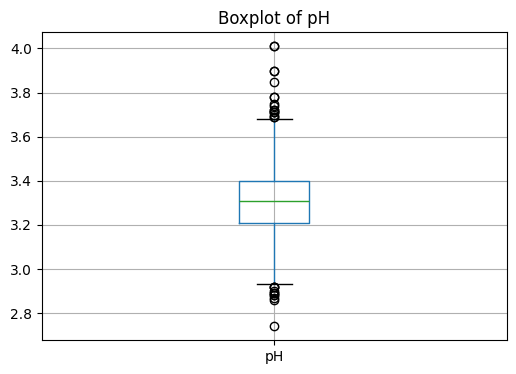

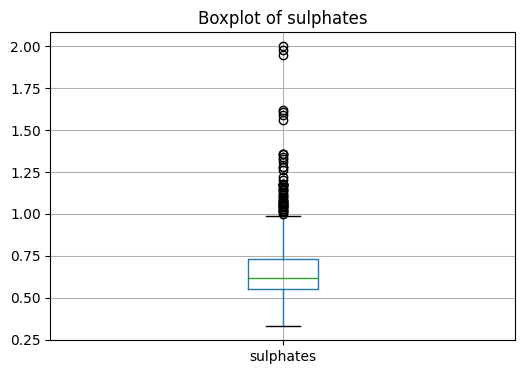

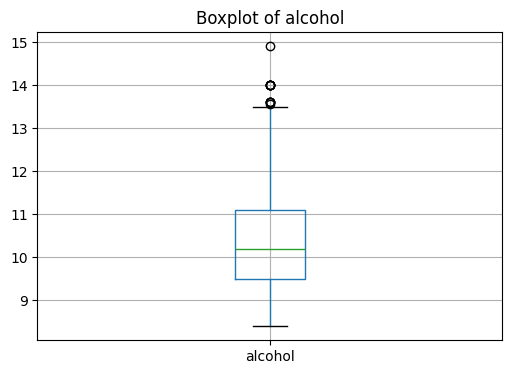

In [63]:
for col in df.columns:
    if col != 'quality':
        plt.figure(figsize=(6,4))
        df.boxplot(column=col)
        plt.title(f"Boxplot of {col}")
        plt.show()


In [64]:
df['quality'].value_counts()

,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


In [65]:
x=df.drop('quality',axis=1)
y=df['quality']

In [66]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state =123)

In [67]:
train_X.shape

(951, 11)

In [70]:
model = Sequential() # ReLU Rectified Linear Unit.
model.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense (units = 6, kernel_initializer = 'uniform', activation= 'relu'))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_6"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237 (948.00 B)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
print(train_X.shape)
print(train_y.shape)

(951, 11)
(951,)


In [74]:
model.fit(train_X, train_y, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
mse = model.evaluate(test_X, test_y)
print(f'Test Mean Squared Error: {mse}')

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 32.3108 - val_loss: 31.0240
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.8929 - val_loss: 30.7270
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.1380 - val_loss: 30.4319
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.7284 - val_loss: 30.1390
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.1097 - val_loss: 29.8489
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.7472 - val_loss: 29.5607
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.8798 - val_loss: 29.2734
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.6747 - val_loss: 28.9893
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.1810 - val_loss: 28.7078
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.9661 - val_loss: 28.4273
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.7101 - val_loss: 28.1492
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [75]:
predictions=model.predict(test_X)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [76]:
predictions

array([[1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
       [1.2786932],
